In [ ]:
# evaluate prophet time series forecasting model on hold out dataset
import pandas as pd
import fbprophet
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
 

# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
# load data
path = '/content/drive/My Drive/GeoML-1.0/production_forecast.txt'
df = pd.read_table(path)
df

,Date,BFPD,BOPD,WC
0,6/1/2013,4023.636364,2213,45.0
1,6/2/2013,4300.000000,2408,44.0
2,6/3/2013,4289.285714,2402,44.0
3,6/4/2013,4305.357143,2411,44.0
4,6/5/2013,4321.428571,2420,44.0
...,...,...,...,...
2693,10/15/2020,3754.166667,2703,28.0
2694,10/16/2020,3751.388889,2701,28.0
2695,10/17/2020,3756.944444,2705,28.0
2696,10/18/2020,3550.000000,2556,28.0


In [ ]:
df['Date'] = to_datetime(df['Date'])
df

,Date,BFPD,BOPD,WC
0,2013-06-01,4023.636364,2213,45.0
1,2013-06-02,4300.000000,2408,44.0
2,2013-06-03,4289.285714,2402,44.0
3,2013-06-04,4305.357143,2411,44.0
4,2013-06-05,4321.428571,2420,44.0
...,...,...,...,...
2693,2020-10-15,3754.166667,2703,28.0
2694,2020-10-16,3751.388889,2701,28.0
2695,2020-10-17,3756.944444,2705,28.0
2696,2020-10-18,3550.000000,2556,28.0


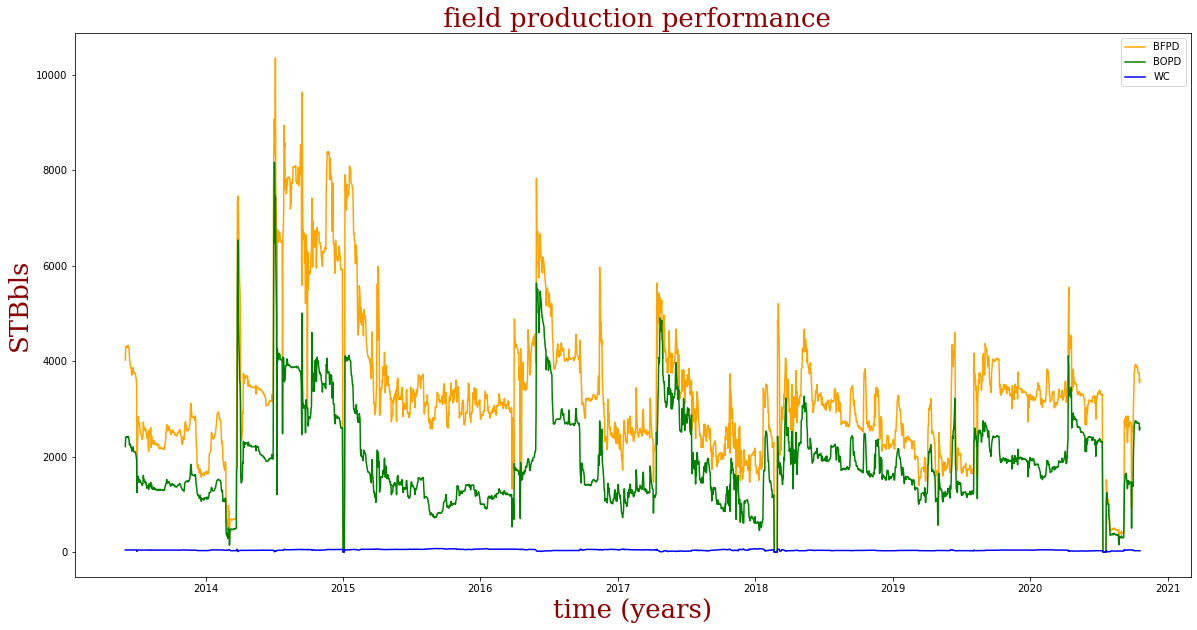

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
#fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['BFPD'], label= 'BFPD', color= 'Orange' )
plt.plot(df['Date'], df['BOPD'], label= 'BOPD', color = 'green')
plt.plot(df['Date'], df['WC'], label= 'WC', color = 'b')
plt.xlabel('time (years)', fontdict=font)
plt.ylabel('STBbls', fontdict=font)
#plt.xticks(ticks=df['Date'], rotation = 90)
plt.title(' field production performance', fontdict=font)
plt.legend()
plt.show()


In [ ]:
# prepare expected column names
#df.columns = ['ds', 'y','BOPD', 'WC']
#df['ds']= to_datetime(df['ds'])
#df.drop(['BOPD', 'WC'], axis=1, inplace=True)
#df
train = df.drop(df.index[-365:])
train.columns = ['ds', 'y','BOPD', 'WC']
train.drop(['BOPD', 'WC'], axis=1, inplace=True)

train.tail()

,ds,y
2328,2019-10-16,3289.473684
2329,2019-10-17,3424.561404
2330,2019-10-18,3343.859649
2331,2019-10-19,3350.877193
2332,2019-10-20,3347.368421


In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
#future = list()
#for i in range(1, 13):
	#date = '2013-%02d' % i
	#future.append([date])
#future = DataFrame(future)
#future.columns = ['ds']
#future['ds'] = to_datetime(future['ds'])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2693,2020-10-15,2590.108207,163.383616,5148.093100
2694,2020-10-16,2582.505629,62.392078,4925.754891
2695,2020-10-17,2592.595028,179.087203,5018.351045
2696,2020-10-18,2597.180933,130.533064,5144.296839
2697,2020-10-19,2624.257431,7.587541,5173.070503


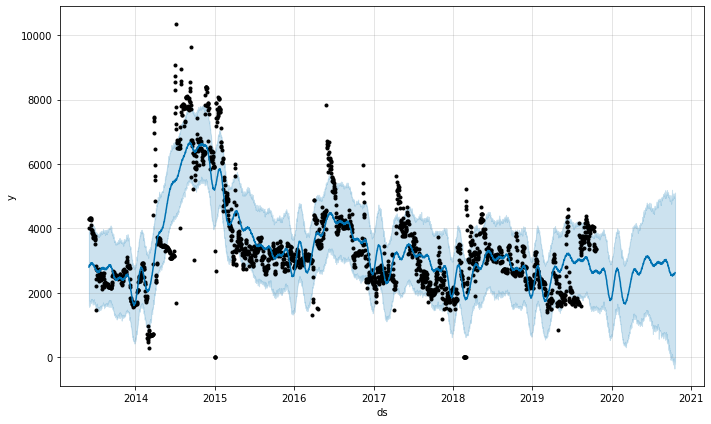

In [ ]:
# use the model to make a forecast
forecast = model.predict(future)
# plot forecast
model.plot(forecast)
plt.show()


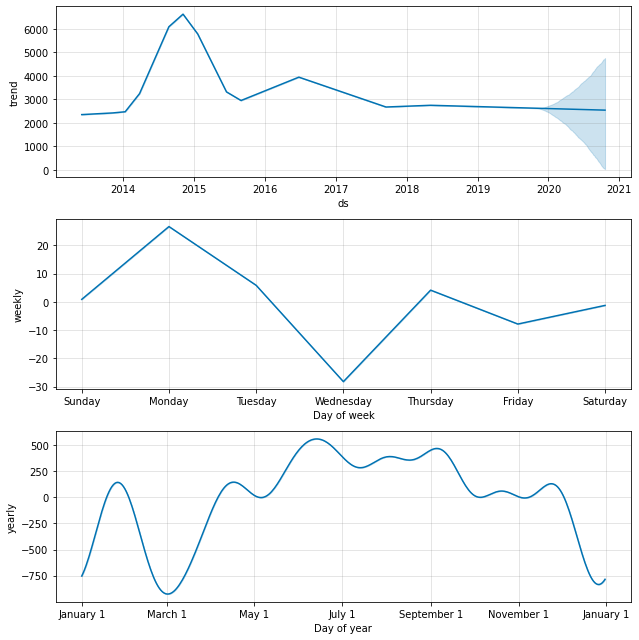

In [ ]:
fig2 = model.plot_components(forecast)

MAE: 1276.626


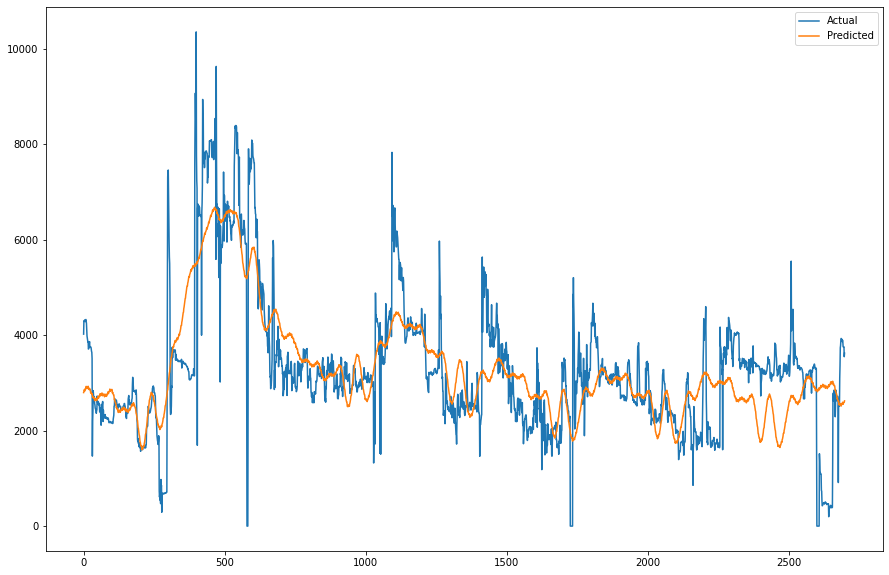

In [ ]:
# calculate MAE between expected and predicted values for december
y_true = df['BFPD'].values
y_predh = forecast['yhat_upper'].values
y_predm = forecast['yhat_lower'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_predh)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.figure(figsize=(15,10))
plt.plot(y_true, label='Actual')
#plt.plot(y_predh, label='Maximum Predicted')
#plt.plot(y_predm, label='Minimum Predicted')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()